# Geospatial Analysis

This notebook analyzes the spatial distribution of 
property prices using geographic coordinates (latitude and longitude).  
The goal is to identify spatial patterns and neighborhood 
effects that motivate the use of satellite imagery in multimodal modeling.


In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
DATA_DIR = Path("/Users/yashj/OneDrive/Desktop/ACM/CDC_property_valuation/data")
PROCESSED_DIR = DATA_DIR / "processed"


In [3]:
df = pd.read_csv(PROCESSED_DIR / "train_processed.csv")
print("Number of samples:", len(df))
df[["lat", "long", "log_price"]].head()


Number of samples: 12888


,lat,long,log_price
0,47.6789,-122.351,13.362169
1,47.7657,-122.284,13.244583
2,47.6810,-122.361,13.058360
3,47.7506,-122.063,13.038984
4,47.6897,-122.294,13.106236


In [4]:
df[["lat", "long"]].describe()

,lat,long
count,12888.000000,12888.000000
mean,47.560833,-122.213585
std,0.138483,0.139966
min,47.159300,-122.519000
25%,47.472775,-122.328000
50%,47.572250,-122.229000
75%,47.678200,-122.124000
max,47.777600,-121.316000


**Observation:**  
Latitude and longitude span a continuous geographic region, making spatial analysis meaningful.


This plot shows the spatial density of properties and highlights clustering in certain regions.


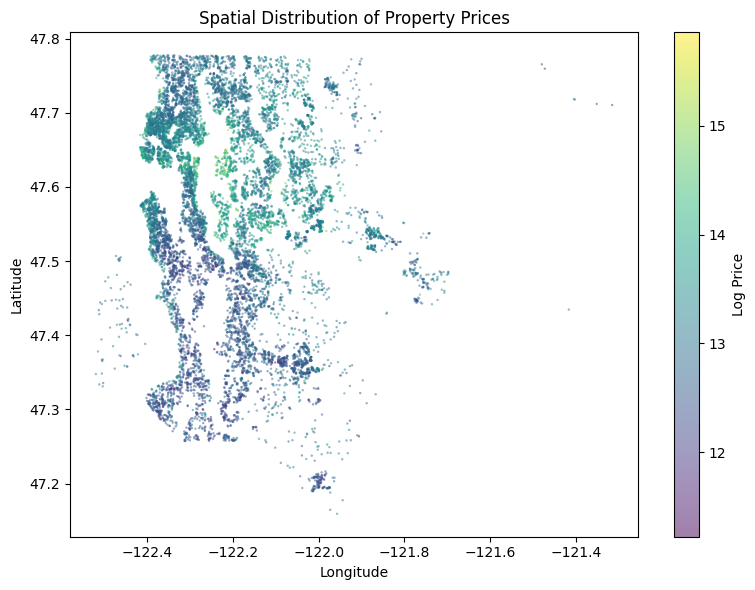

In [5]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    df["long"],
    df["lat"],
    c=df["log_price"],
    cmap="viridis",
    s=3,
    alpha=0.5,
    edgecolors="none"
)
plt.colorbar(sc, label="Log Price")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial Distribution of Property Prices")
plt.tight_layout()
plt.show()


**Observation:**  
High- and low-priced properties are spatially clustered rather than uniformly distributed,
indicating strong neighborhood effects in property valuation.


In [6]:
lat_bins = np.linspace(df["lat"].min(), df["lat"].max(), 60)
lon_bins = np.linspace(df["long"].min(), df["long"].max(), 60)

df["lat_bin"] = np.digitize(df["lat"], lat_bins)
df["lon_bin"] = np.digitize(df["long"], lon_bins)


In [7]:
grid_mean = (
    df.groupby(["lat_bin", "lon_bin"])["log_price"]
      .mean()
      .reset_index()
)

pivot_mean = grid_mean.pivot(
    index="lat_bin",
    columns="lon_bin",
    values="log_price"
)


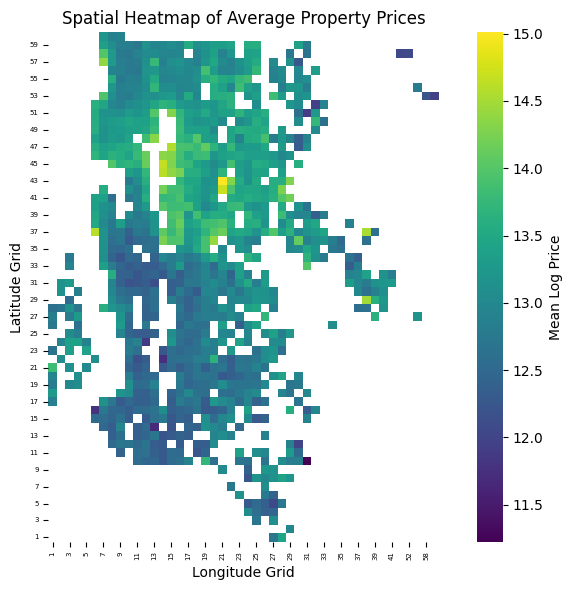

In [8]:
plt.figure(figsize=(8, 6))

ax = sns.heatmap(
    pivot_mean,
   cmap="viridis",
    cbar_kws={"label": "Mean Log Price"},
    mask=pivot_mean.isna(),
    square=True
)

ax.invert_yaxis()

ax.set_xlabel("Longitude Grid")
ax.set_ylabel("Latitude Grid")
ax.set_title("Spatial Heatmap of Average Property Prices")

ax.tick_params(axis="both", labelsize=5) 

plt.tight_layout()
plt.show()


This smoothed heatmap reveals large-scale regional price trends,
confirming spatial autocorrelation in property values.


In [9]:
grid_std = (
    df.groupby(["lat_bin", "lon_bin"])["log_price"]
      .std()
      .reset_index()
)

pivot_std = grid_std.pivot(
    index="lat_bin",
    columns="lon_bin",
    values="log_price"
)

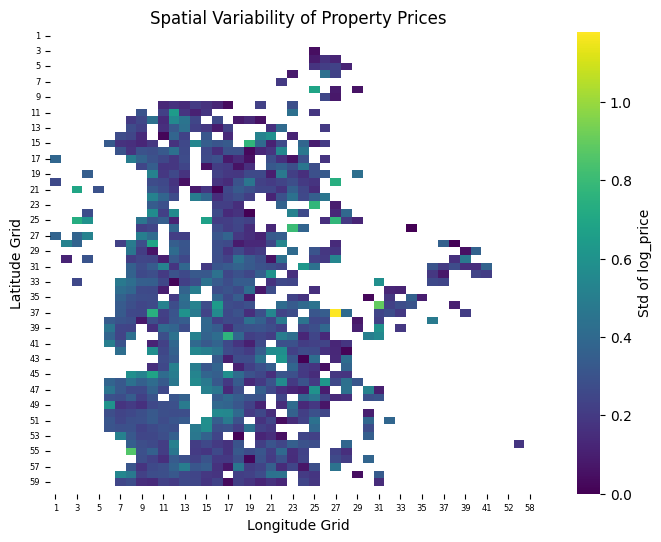

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    pivot_std,
    cmap="viridis",
    cbar_kws={"label": "Std of log_price"}
)
ax.tick_params(axis="both", labelsize=6) 
plt.xlabel("Longitude Grid")
plt.ylabel("Latitude Grid")
plt.title("Spatial Variability of Property Prices")
plt.show()


Regions with high local price variability suggest that fine-grained neighborhood
characteristics influence property valuation.


## Limitations of Latitude and Longitude

While geographic coordinates encode coarse location, they do not capture:
- Road connectivity and accessibility
- Green spaces and water bodies
- Urban density and land use patterns
- Built environment structure

Such fine-grained spatial information is naturally present in satellite imagery,
motivating its use as a complementary modality.


## Geospatial Analysis Summary

- Property prices exhibit strong spatial clustering.
- Both regional trends and local neighborhood effects are evident.
- Spatial smoothing highlights geographic price patterns.
- Latitude and longitude alone are insufficient to capture detailed spatial context.

These findings justify the incorporation of satellite imagery in multimodal
property valuation models to better encode neighborhood-level information.
